# Bike Sharing Assignment


In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [402]:
df = pd.read_csv('day.csv')

In [403]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [405]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation


## Converting continuous variables to Categorical Variables

In [406]:
df['weathersit'] = df['weathersit'].astype(str)

In [407]:
df['weathersit'] = df['weathersit'].apply(lambda x :((((x.replace('1','Clear and Partly cloudy')).replace( '2','misty and cloudy')).replace('3','light snow,rain & scattered clouds')).replace('4','heavy rain & foggy')))

In [408]:
df['season'] = df['season'].astype(str)

In [409]:
df['season'] = df['season'].apply(lambda x :((((x.replace('1','spring')).replace( '2','summer')).replace('3','fall')).replace('4','winter')))

# Renaming the Columns

In [410]:
df.rename(columns = {'yr':'year','mnth':'month','cnt':'count'},inplace =True)

In [411]:
df.drop(['casual','registered'], axis=1, inplace= True)

In [412]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,01-01-2018,spring,0,1,0,6,0,misty and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,1,0,0,0,misty and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear and Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear and Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear and Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


# Checking If a Linear Regression is Possible or Not

# Visualizing the numerical variables

<Figure size 1000x1200 with 0 Axes>

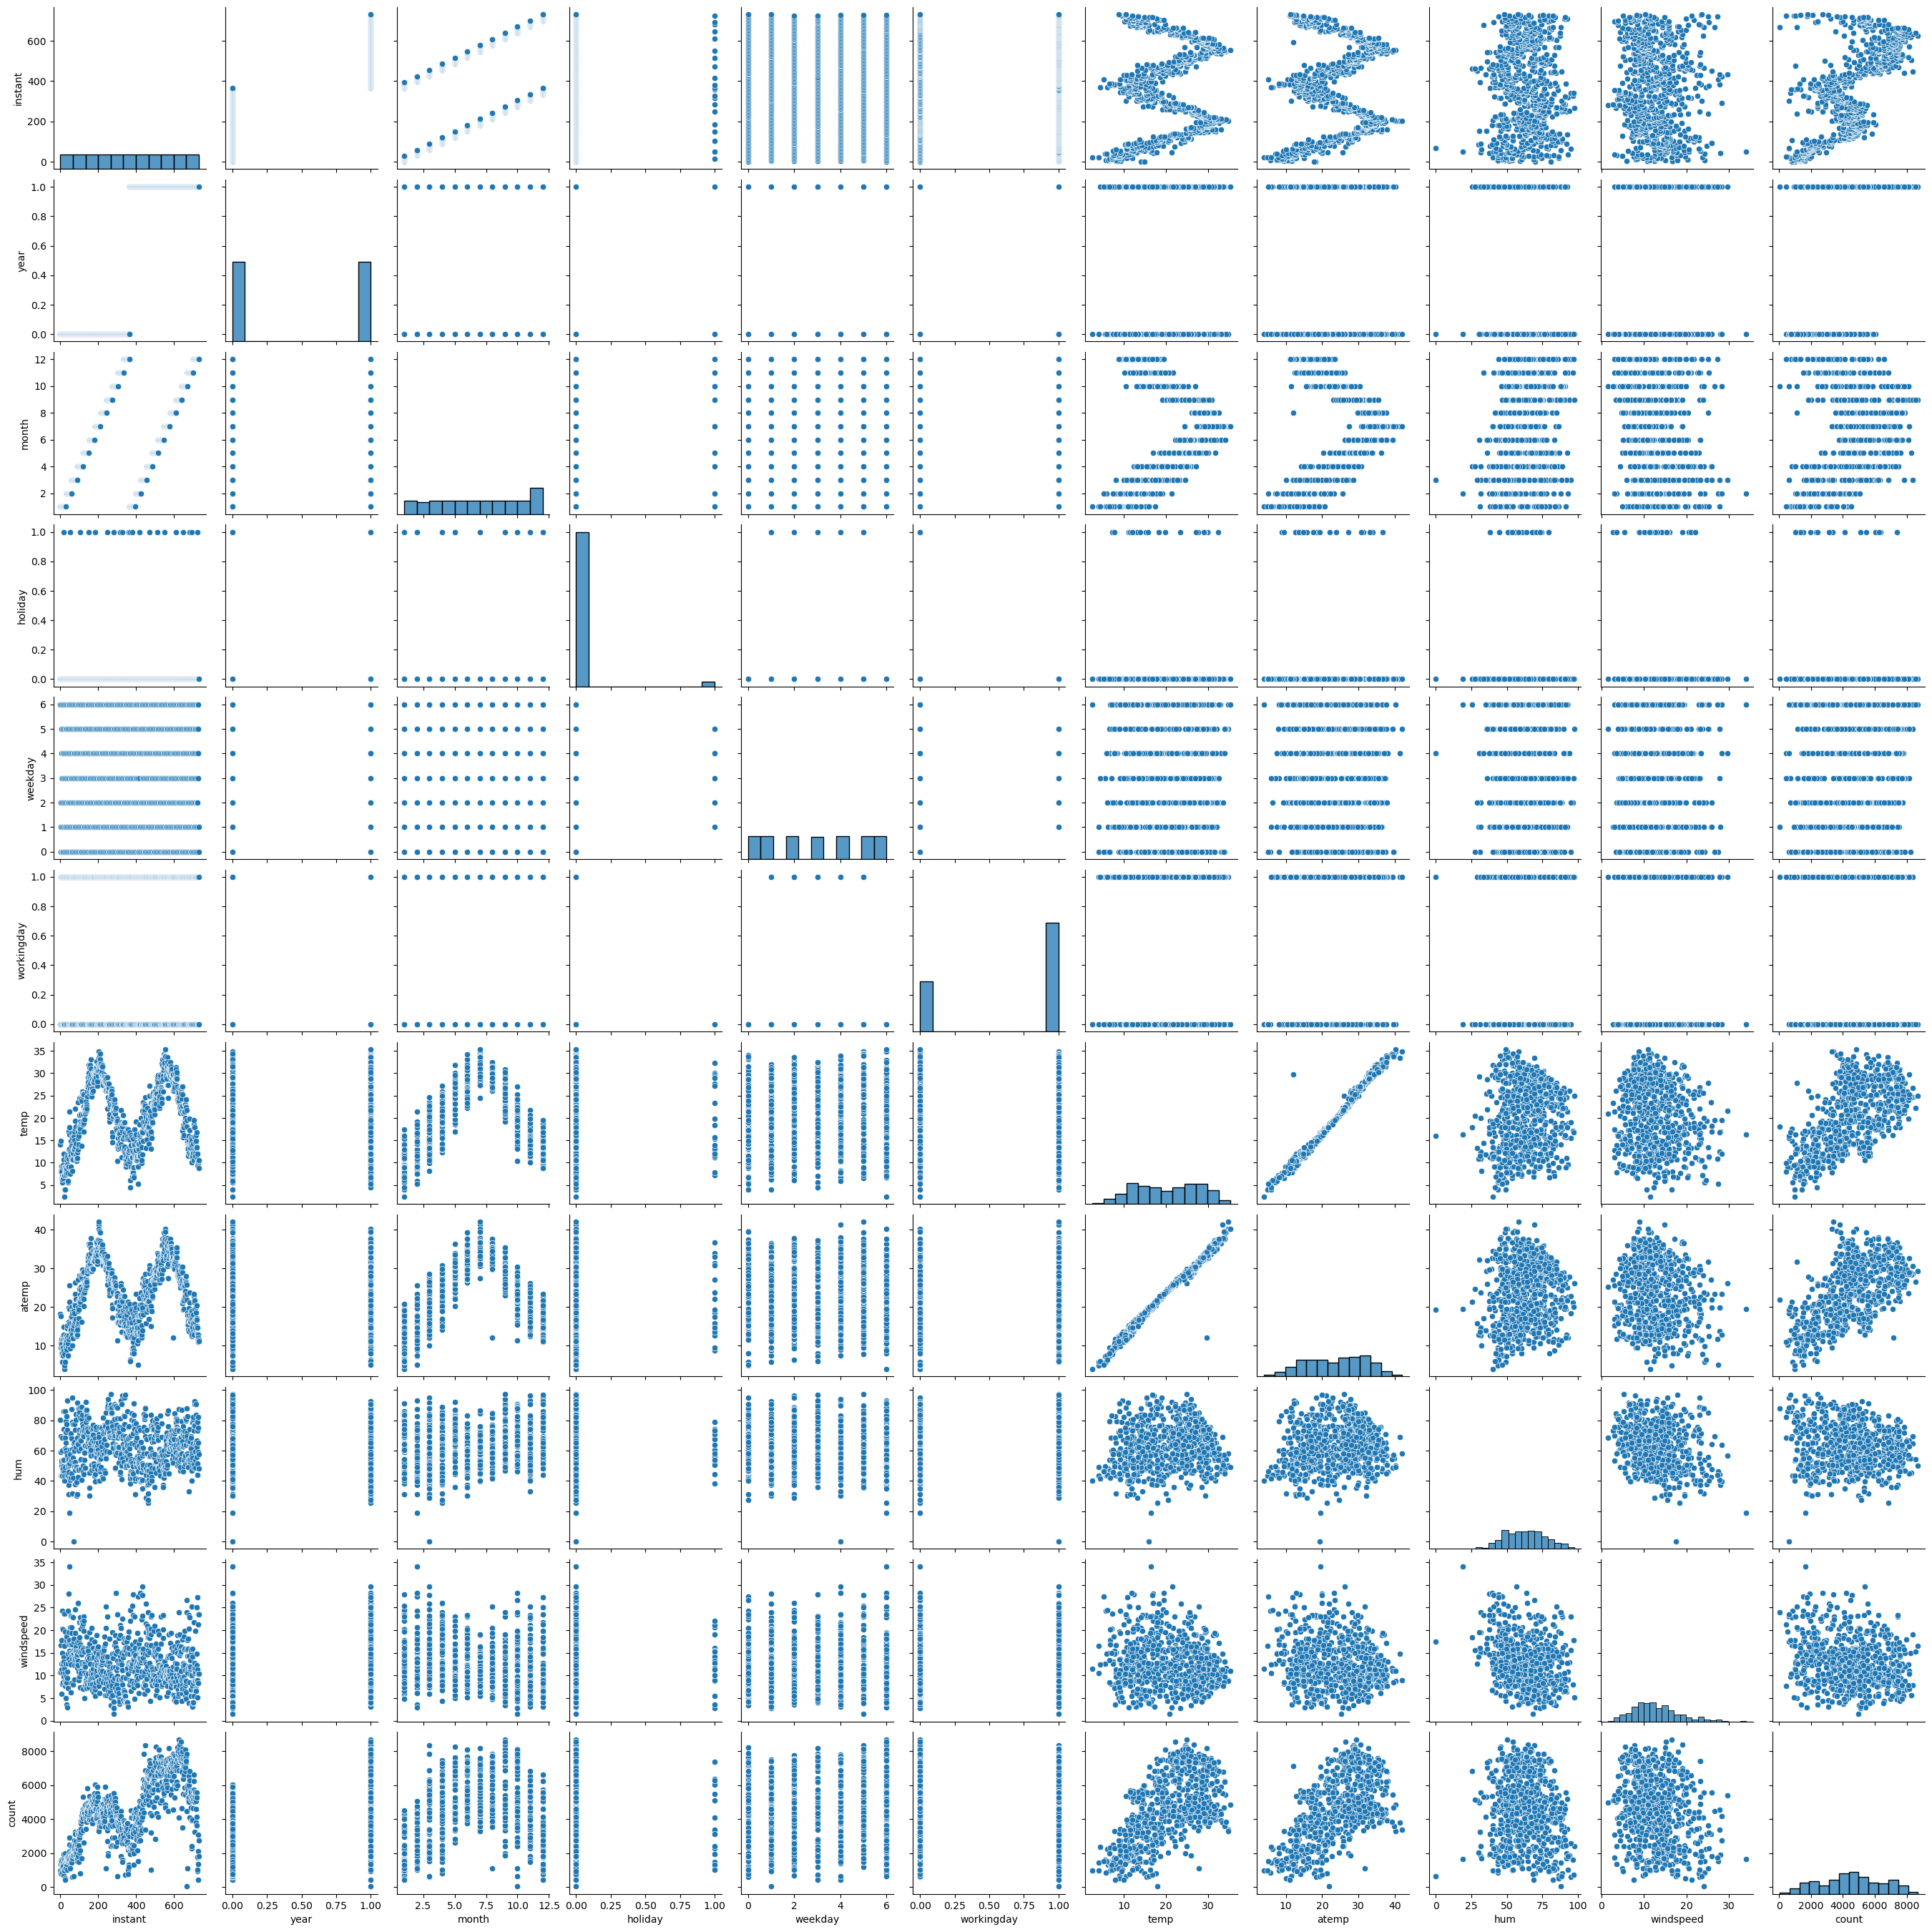

In [413]:
plt.figure(figsize = (10,12))
sns.pairplot(df)
plt.show()

# Visualizing the Categorical Variables


<Axes: xlabel='season', ylabel='count'>

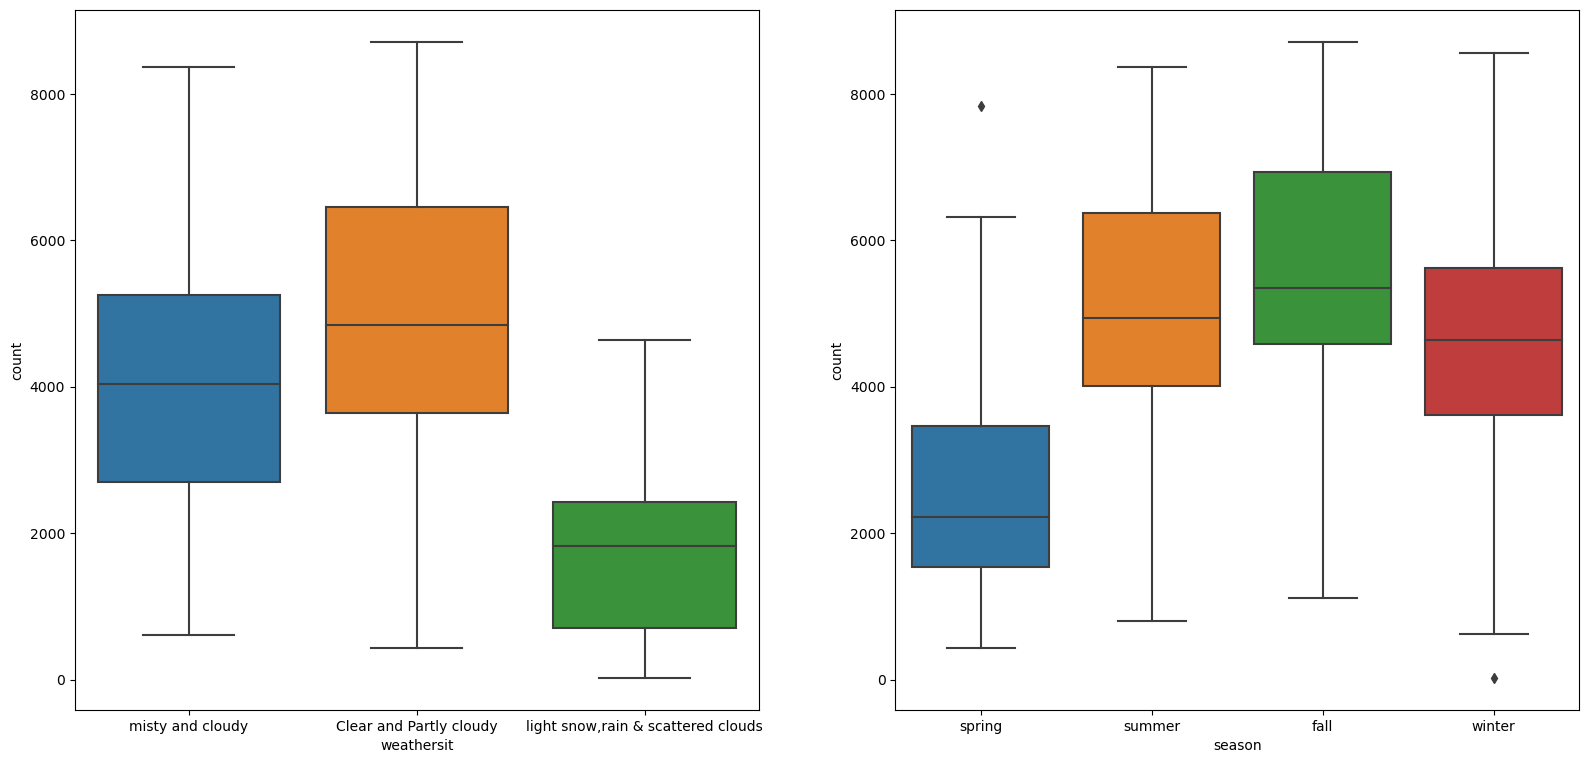

In [414]:
plt.figure(figsize =(30,20))
plt.subplot(2,3,1)
sns.boxplot(x ='weathersit', y= 'count', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'count', data = df)


# Preparing the Data for Modelling

### Converting Categorical Variables into Dummmy Variables

In [415]:
# Creating dummy variable and dropping redundant dummy variable

In [416]:
new_df = pd.get_dummies(df[['weathersit','season']], drop_first = True)

In [417]:
new_df.head()

,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
0,0,1,1,0,0
1,0,1,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [418]:
df = pd.concat([df,new_df], axis = 1)

In [419]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
0,1,01-01-2018,spring,0,1,0,6,0,misty and cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,2,02-01-2018,spring,0,1,0,0,0,misty and cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,3,03-01-2018,spring,0,1,0,1,1,Clear and Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,Clear and Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,Clear and Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [420]:
df.drop(columns = ['weathersit','season','instant','dteday'], axis =1, inplace = True)

# Splitting the dataset into test and train sets

In [421]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [422]:
df.shape

(730, 15)

In [423]:
df_train.shape

(510, 15)

In [424]:
df_test.shape

(220, 15)

In [425]:
scaler = MinMaxScaler()
num_vars = ['month','weekday','temp','atemp','hum','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,count,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0


In [426]:
df_train.describe()

,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,count,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


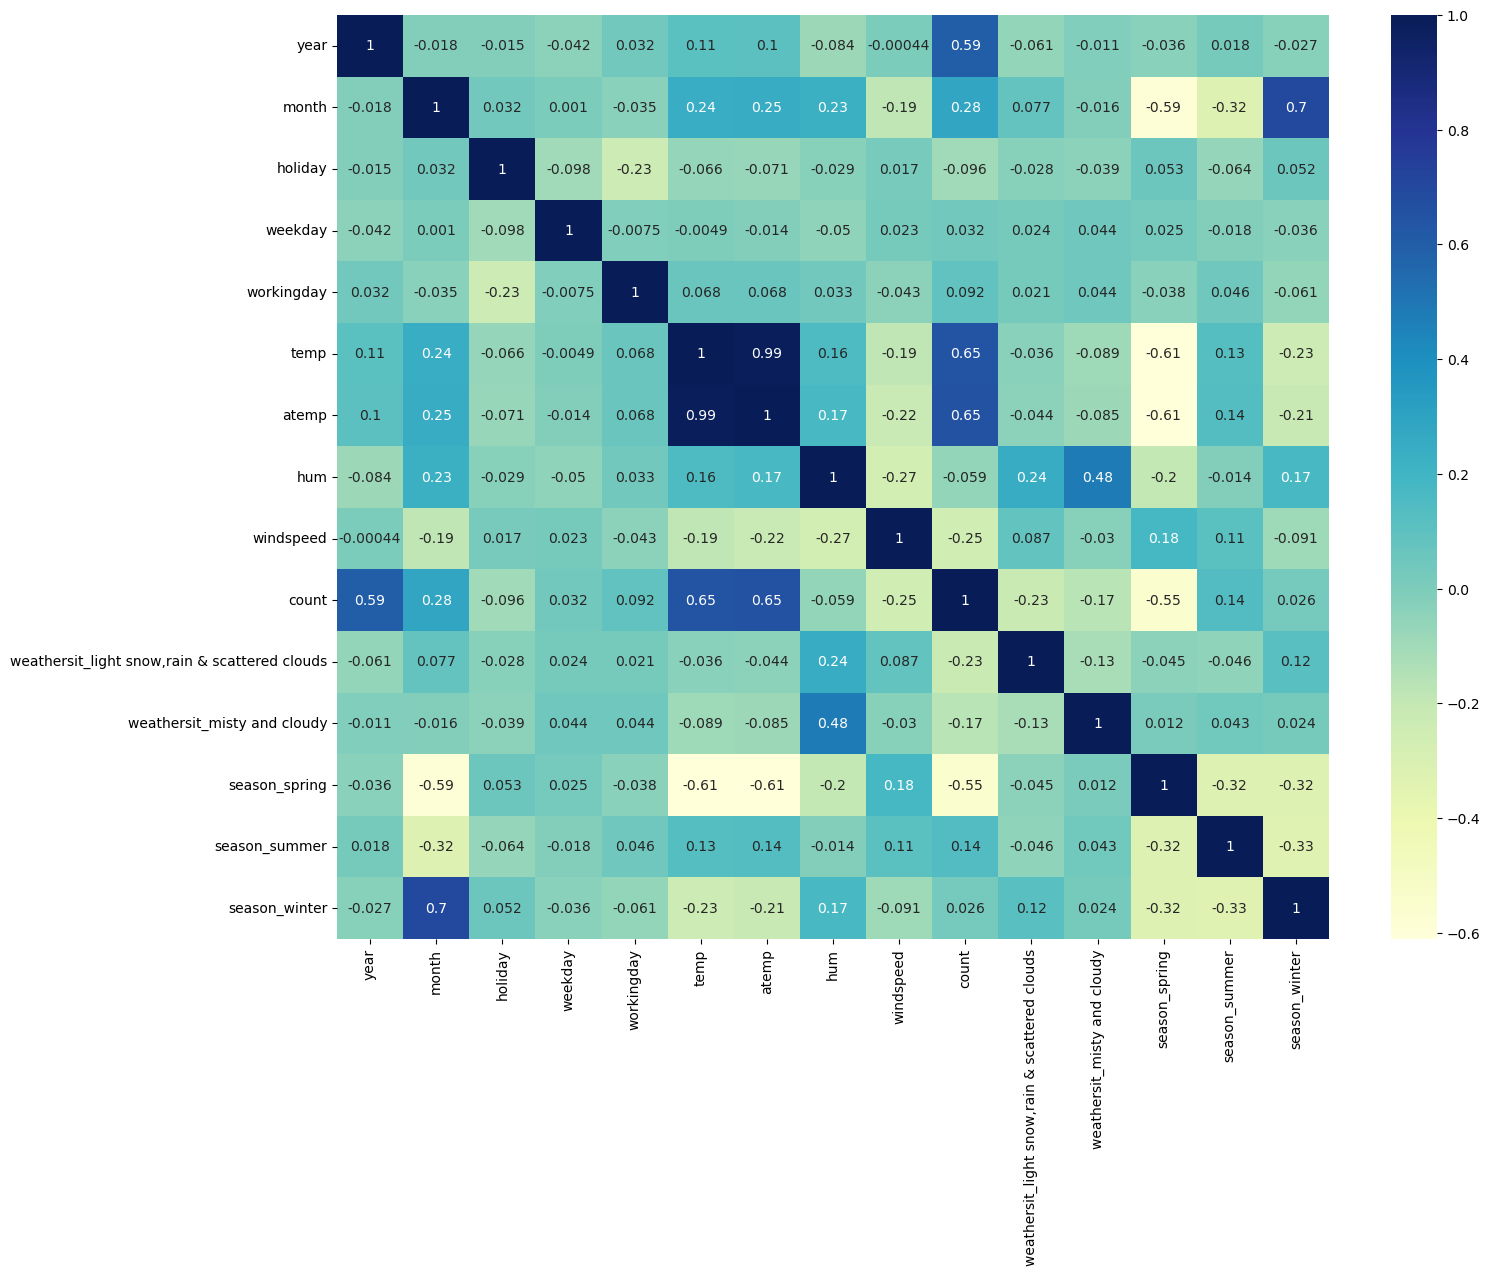

In [427]:
plt.figure(figsize = (16,12))
sns.heatmap(df_train.corr(), annot = True, cmap ='YlGnBu')
plt.show()

# Hybrid Model(Automated & Manual)


In [428]:
y_train = df_train.pop('count')
X_train = df_train

In [429]:
X_train.head()

,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0,1,1,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0


In [430]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

# Building a Model with all Variables

In [431]:
X_train_sm = sm.add_constant(X_train)

In [432]:


lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.01e-182
Time:                        18:38:51   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2400      0.039      6.208      0.000       0.164       0.316
year                                              0.2322      0.008     27.702      0.000       0.216       0.249
month                                             0.0149      0.026      0.578      0.563      -0.036       0.066
holiday                                          -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday                                           0.0483      0.012      3.878      0.000       0.024       0.073
workingday                                        0.0187      0.009      2.059      0.040       0.001       0.037
temp                                              0.4329      0.139      3.118      0.002       0.160       0.706
atemp                                             0.0628      0.142      0.443      0.658      -0.216       0.342
hum                                              -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed                                        -0.1783      0.027     -6.597      0.000      -0.231      -0.125
weathersit_light snow,rain & scattered clouds    -0.2463      0.027     -9.024      0.000      -0.300      -0.193
weathersit_misty and cloudy                      -0.0566      0.011     -5.203      0.000      -0.078      -0.035
season_spring                                    -0.0695      0.023     -3.013      0.003      -0.115      -0.024
season_summer                                     0.0473      0.016      3.027      0.003       0.017       0.078
season_winter                                     0.0835      0.019      4.472      0.000       0.047       0.120
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif


,Features,VIF
5,temp,379.33
6,atemp,366.74
7,hum,30.16
1,month,12.48
8,windspeed,5.02
13,season_winter,4.63
11,season_spring,4.49
4,workingday,3.20
3,weekday,3.17
12,season_summer,2.72


# Dropping the column which have high p-value and high VIF

In [434]:
X = X_train.drop('atemp', axis =1)


# Rebuilding the model

In [435]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.35e-183
Time:                        18:38:51   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2398      0.039      6.208      0.000       0.164       0.316
year                                              0.2321      0.008     27.721      0.000       0.216       0.249
month                                             0.0150      0.026      0.581      0.561      -0.036       0.066
holiday                                          -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday                                           0.0480      0.012      3.864      0.000       0.024       0.072
workingday                                        0.0187      0.009      2.058      0.040       0.001       0.037
temp                                              0.4925      0.034     14.427      0.000       0.425       0.560
hum                                              -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed                                        -0.1807      0.027     -6.817      0.000      -0.233      -0.129
weathersit_light snow,rain & scattered clouds    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
weathersit_misty and cloudy                      -0.0567      0.011     -5.218      0.000      -0.078      -0.035
season_spring                                    -0.0684      0.023     -2.985      0.003      -0.113      -0.023
season_summer                                     0.0485      0.015      3.152      0.002       0.018       0.079
season_winter                                     0.0848      0.018      4.614      0.000       0.049       0.121
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,Features,VIF
6,hum,30.10
5,temp,16.85
1,month,12.48
7,windspeed,4.80
12,season_winter,4.49
10,season_spring,4.42
4,workingday,3.20
3,weekday,3.16
11,season_summer,2.62
9,weathersit_misty and cloudy,2.32


# Again Dropping the columns which have high p-value and high VIF


In [437]:
X_a = X.drop('month', axis =1)

# Rebuilding the Model

In [438]:
X_train_sm = sm.add_constant(X_a)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.89e-184
Time:                        18:38:52   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2469      0.037      6.741      0.000       0.175       0.319
year                                              0.2319      0.008     27.737      0.000       0.216       0.248
holiday                                          -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday                                           0.0484      0.012      3.906      0.000       0.024       0.073
workingday                                        0.0186      0.009      2.048      0.041       0.001       0.036
temp                                              0.4933      0.034     14.475      0.000       0.426       0.560
hum                                              -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed                                        -0.1803      0.026     -6.810      0.000      -0.232      -0.128
weathersit_light snow,rain & scattered clouds    -0.2479      0.027     -9.132      0.000      -0.301      -0.195
weathersit_misty and cloudy                      -0.0570      0.011     -5.261      0.000      -0.078      -0.036
season_spring                                    -0.0744      0.020     -3.645      0.000      -0.115      -0.034
season_summer                                     0.0444      0.014      3.245      0.001       0.018       0.071
season_winter                                     0.0892      0.017      5.319      0.000       0.056       0.122
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recalculating VIF

In [439]:
vif = pd.DataFrame()
vif['Features'] = X_a.columns
vif['VIF'] = [variance_inflation_factor(X_a.values,i) for i in range(X_a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,Features,VIF
5,hum,27.35
4,temp,15.71
6,windspeed,4.69
9,season_spring,3.90
3,workingday,3.19
2,weekday,3.11
11,season_winter,3.10
8,weathersit_misty and cloudy,2.28
10,season_summer,2.28
0,year,2.08


# Dropping the variable which have low p-value and high VIF

In [440]:
X_new = X_a.drop('hum', axis =1)

# Rebuilding the model

In [441]:
X_train_sm = sm.add_constant(X_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.17e-183
Time:                        18:38:52   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -956.4
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1813      0.031      5.887      0.000       0.121       0.242
year                                              0.2351      0.008     28.032      0.000       0.219       0.252
holiday                                          -0.0638      0.027     -2.335      0.020      -0.117      -0.010
weekday                                           0.0523      0.012      4.197      0.000       0.028       0.077
workingday                                        0.0190      0.009      2.073      0.039       0.001       0.037
temp                                              0.4669      0.033     13.978      0.000       0.401       0.532
windspeed                                        -0.1552      0.026     -6.073      0.000      -0.205      -0.105
weathersit_light snow,rain & scattered clouds    -0.2828      0.025    -11.244      0.000      -0.332      -0.233
weathersit_misty and cloudy                      -0.0775      0.009     -8.714      0.000      -0.095      -0.060
season_spring                                    -0.0813      0.020     -3.968      0.000      -0.122      -0.041
season_summer                                     0.0402      0.014      2.919      0.004       0.013       0.067
season_winter                                     0.0782      0.017      4.718      0.000       0.046       0.111
==============================================================================
Omnibus:                       70.807   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.444
Skew:                          -0.712   Prob(JB):                     4.85e-39
Kurtosis:                       5.506   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recalculating the VIF

In [442]:
vif = pd.DataFrame()
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.16
2,weekday,3.10
8,season_spring,2.28
0,year,2.07
9,season_summer,1.86
10,season_winter,1.75
7,weathersit_misty and cloudy,1.55
1,holiday,1.10


# Dropping the variable which have high p-value

In [443]:
X_main = X_new.drop('temp', axis =1)

# Rebuilding the model

In [444]:
X_train_sm = sm.add_constant(X_main)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          7.12e-149
Time:                        18:38:52   Log-Likelihood:                 405.80
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     499   BIC:                            -743.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5568      0.018     31.388      0.000       0.522       0.592
year                                              0.2478      0.010     25.222      0.000       0.229       0.267
holiday                                          -0.0682      0.032     -2.118      0.035      -0.131      -0.005
weekday                                           0.0503      0.015      3.426      0.001       0.021       0.079
workingday                                        0.0208      0.011      1.926      0.055      -0.000       0.042
windspeed                                        -0.1757      0.030     -5.844      0.000      -0.235      -0.117
weathersit_light snow,rain & scattered clouds    -0.2947      0.030     -9.944      0.000      -0.353      -0.236
weathersit_misty and cloudy                      -0.0882      0.010     -8.445      0.000      -0.109      -0.068
season_spring                                    -0.3130      0.014    -22.011      0.000      -0.341      -0.285
season_summer                                    -0.0567      0.014     -4.045      0.000      -0.084      -0.029
season_winter                                    -0.0849      0.014     -6.117      0.000      -0.112      -0.058
==============================================================================
Omnibus:                       28.748   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.210
Skew:                          -0.324   Prob(JB):                     1.39e-13
Kurtosis:                       4.539   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recalculating the VIF

In [445]:
vif = pd.DataFrame()
vif['Features'] = X_main.columns
vif['VIF'] = [variance_inflation_factor(X_main.values,i) for i in range(X_main.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,Features,VIF
4,windspeed,3.96
2,weekday,2.64
3,workingday,2.61
7,season_spring,1.90
0,year,1.86
8,season_summer,1.86
9,season_winter,1.70
6,weathersit_misty and cloudy,1.54
5,"weathersit_light snow,rain & scattered clouds",1.08
1,holiday,1.07


# Residual Analysis

In [446]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.795676
426    0.408932
728    0.375116
482    0.676964
111    0.407723
         ...   
578    0.826080
53     0.270224
350    0.358143
79     0.348003
520    0.634138
Length: 510, dtype: float64

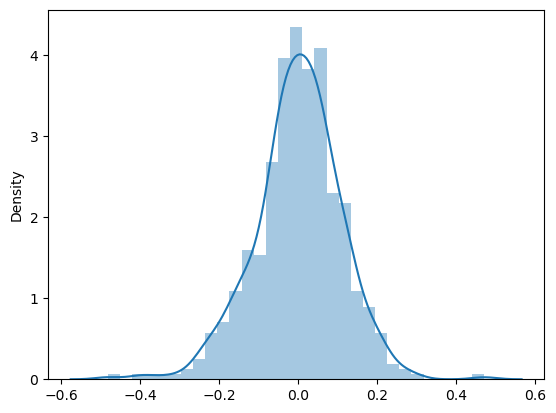

In [447]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# Transforming the Test Dataset

In [448]:

num_vars = ['month','weekday','temp','atemp','hum','windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,count,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,0,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1,0


df_test.describe()

# Evaluating the significance of model on test dataset

In [449]:
y_test = df_test.pop('count')
X_test = df_test

# Add a constant to X_test

In [450]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,"weathersit_light snow,rain & scattered clouds",weathersit_misty and cloudy,season_spring,season_summer,season_winter
184,1.0,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0
535,1.0,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0
299,1.0,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0,1,0,0,1
221,1.0,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,0,0,1,0


# Removing the variables which we have removed for X_train while making the model

In [451]:
X_test_sm = X_test_sm.drop(['atemp','month','hum','temp'],axis = 1)

#  Predicting the test set


In [452]:
y_test_pred = lr_model.predict(X_test_sm)

In [453]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.745919950987289